In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Panel A: sample size vs. power for pairwise SNPxgene.¶

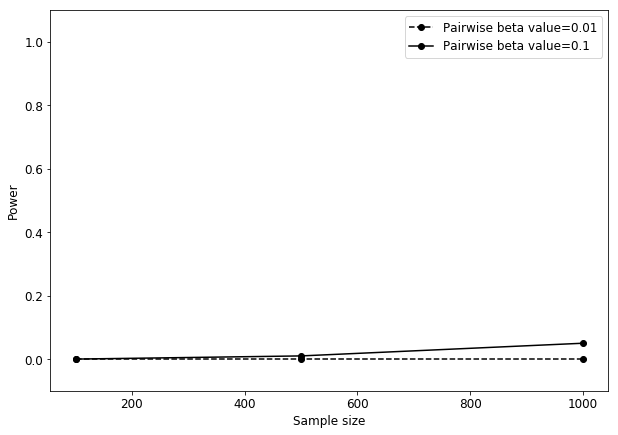

In [34]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def get_path(method, samplesize, target, betavalue, fname):
    if method == "pairwise":
        return  f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{samplesize}/SingleParameter/numTarget_{target}/Beta_{betavalue}/{fname}'
    elif method == "CPMA":
        return f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{samplesize}/SingleParameter/numTarget_{target}/Beta_{betavalue}/{fname}'
    else: return None

def plot_power(target, beta_values, samplesize, fname, label_name, method, color="black", linestyles=None):
    for beta in beta_values:
        power = []
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = get_path(method, s, target, value, fname)
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        if linestyles is None:
            ls = "solid"
        else: ls = linestyles[beta_values.index(beta)]
        plt.plot(samplesize, power, label=f'{label_name}={beta}', marker='o', color=color, linestyle=ls)
        
    
plt.figure(figsize=(10,7))


#beta_values = [0, 0.01, 0.1, 1]
beta_values = [0.01, 0.1]

samplesize = [100, 500, 1000]
target = 1000

# plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA_x 1.0 beta_value')
plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value',
           "pairwise", linestyles=["dashed", "solid"]) 
# plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

plt.xlabel('Sample size')
plt.ylabel('Power')
plt.ylim(-0.1, 1.1)
plt.grid(False)
#plt.xscale("log")
plt.legend();

# Panel B: Power vs. sample size for CPMA

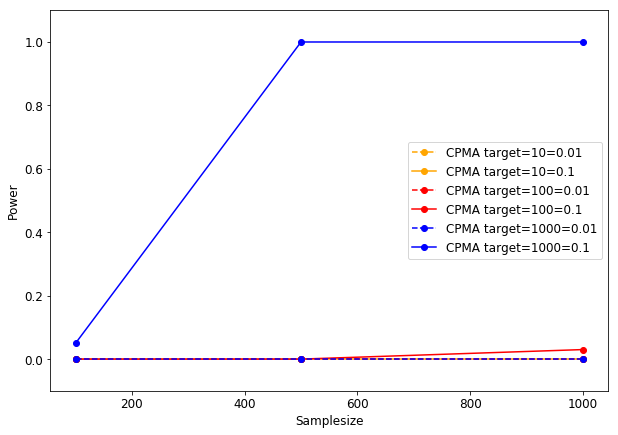

In [33]:
plt.figure(figsize=(10,7))


beta_values = [ 0.01, 0.1]
samplesize = [100, 500, 1000]
target_colors = {
    10: "orange",
    100: "red",
    1000: "blue"
}
for target in [10,100,1000]:
    plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA target=%s'%target,
              "CPMA", linestyles=["dashed","solid"], color=target_colors[target])

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.ylim(-0.1, 1.1)
#plt.xscale("log")
plt.legend()